<a href="https://colab.research.google.com/github/Yamm23/Computer-Vision-Mini/blob/main/StrawberryRipeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/CNN/StrawberryRipeTest"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 15

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 418 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Initially freeze

# Build top model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train with frozen base
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=10,
                    callbacks=[early_stop, lr_schedule])

# Fine-tune top 30 layers of base model
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Compile with lower LR for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune
fine_tune_history = model.fit(train_gen,
                              validation_data=val_gen,
                              epochs=5,
                              callbacks=[early_stop, lr_schedule])


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6529 - loss: 0.9334 - val_accuracy: 0.8544 - val_loss: 0.6459 - learning_rate: 1.0000e-04
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 563ms/step - accuracy: 0.8013 - loss: 0.6351 - val_accuracy: 0.8447 - val_loss: 0.5695 - learning_rate: 1.0000e-04
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 486ms/step - accuracy: 0.8766 - loss: 0.5296 - val_accuracy: 0.9126 - val_loss: 0.5245 - learning_rate: 1.0000e-04
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 563ms/step - accuracy: 0.9233 - loss: 0.4391 - val_accuracy: 0.8835 - val_loss: 0.4973 - learning_rate: 1.0000e-04
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 504ms/step - accuracy: 0.9386 - loss: 0.4206 - val_accuracy: 0.8835 - val_loss: 0.4696 - learning_rate: 1.0000e-04
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 525ms/step - accuracy: 0.9697 - loss: 0.3529 - val_accuracy: 0.8738 - val_loss: 0.4861 - learning_rate: 1.0000e-04
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 547ms/step - accuracy: 0.

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[early_stop]
)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5316 - loss: 0.9082 - val_accuracy: 0.7864 - val_loss: 0.4822
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 488ms/step - accuracy: 0.7134 - loss: 0.5596 - val_accuracy: 0.8835 - val_loss: 0.3478
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 653ms/step - accuracy: 0.8043 - loss: 0.4432 - val_accuracy: 0.8932 - val_loss: 0.2761
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 511ms/step - accuracy: 0.9252 - loss: 0.2532 - val_accuracy: 0.9320 - val_loss: 0.2689
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 481ms/step - accuracy: 0.9641 - loss: 0.1961 - val_accuracy: 0.9029 - val_loss: 0.2488
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 562ms/step - accuracy: 0.9427 - loss: 0.1704 - val_accuracy: 0.9320 - val_loss: 0.2199
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 478ms/step - accuracy: 0.9574 - loss: 0.1407 - val_accuracy: 0.8932 - val_loss: 0.2208
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 554ms/step - accuracy: 0.9465 - loss: 0.1404 - val_accuracy: 0.8

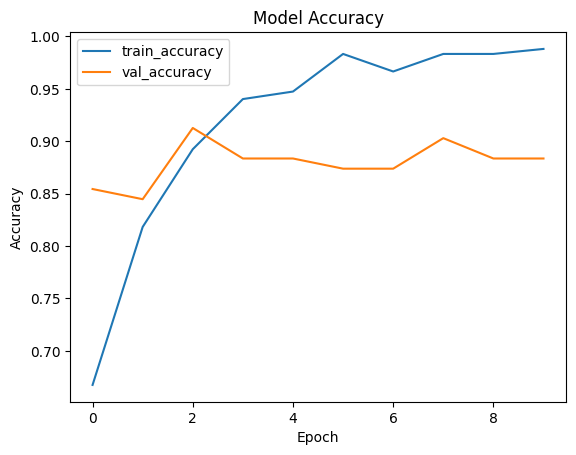

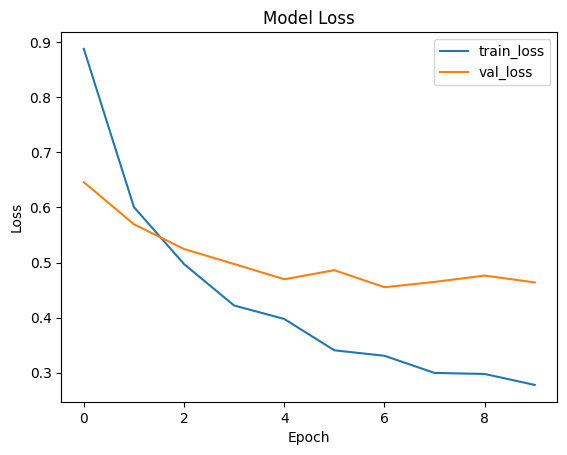

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

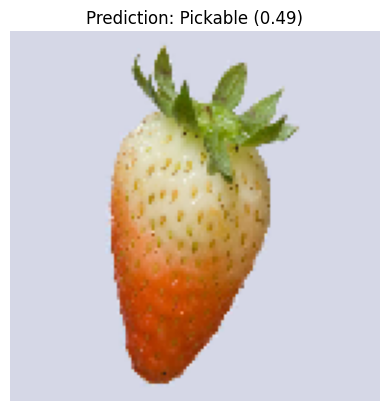

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Set image input size used during training
IMG_SIZE = (128, 128)  # make sure it matches your model's input

def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0  # normalize
    img_tensor = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Predict using the trained model
    prediction = model.predict(img_tensor, verbose=0)[0][0]  # scalar output
    class_name = "Pickable" if prediction < 0.5 else "UnPickable"

    # Display
    plt.imshow(img)
    plt.title(f"Prediction: {class_name} ({prediction:.2f})")
    plt.axis('off')
    plt.show()

# Example usage
predict_image("/content/istockphoto-158869519-612x612.jpg")


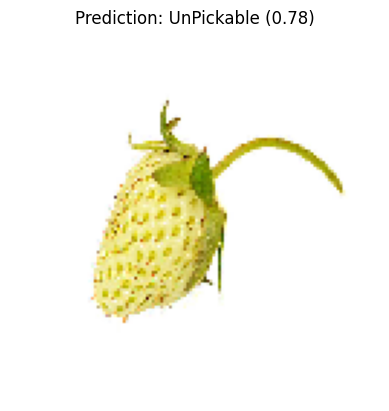

In [ ]:
predict_image("/content/istockphoto-178440908-612x612.jpg")

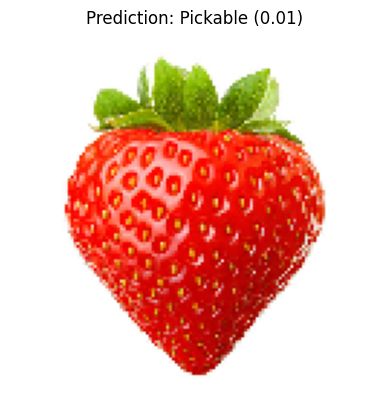

In [ ]:
predict_image("/content/istockphoto-579754040-612x612.jpg")